In [2]:
# first import all necessary libraries
import itertools
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
# Read the cleaned data
df_train = pd.read_csv("train_cleaned.csv")

The analysis is performed in the following order:

1. First find the distribution of each of the variable - categorical and numerical
2. Find the importance of each variable on the target variable 'TARGET_FLAG'
3. Plot each variable against the others 
4. Next steps


In [4]:
# Create the dataframes for categorical, numerical and target variables

cats = ['PARENT1', 'MSTATUS', 'SEX', 'EDUCATION', 'JOB', 'CAR_USE', 'CAR_TYPE', 'RED_CAR', 'REVOKED', 'URBANICITY']
nums = ['KIDSDRIV', 'AGE', 'HOMEKIDS', 'YOJ', 'TRAVTIME', 'TIF', 'CLM_FREQ', 'MVR_PTS', 'CAR_AGE', 'INCOME', 'HOME_VAL', 'BLUEBOOK', 'OLDCLAIM']
target = ['TARGET_FLAG']

# Define df_cat , df_num and target dataframes
df_cat = df_train[cats].copy()
df_num = df_train[nums].copy()
target = df_train[target].copy()

# Create the X matrix for our data
X_train = pd.concat([df_cat,df_num], axis=1)

In [6]:
# Check X
X_train.head(2)

,PARENT1,MSTATUS,SEX,EDUCATION,JOB,CAR_USE,CAR_TYPE,RED_CAR,REVOKED,URBANICITY,...,YOJ,TRAVTIME,TIF,CLM_FREQ,MVR_PTS,CAR_AGE,INCOME,HOME_VAL,BLUEBOOK,OLDCLAIM
0,No,z_No,M,PhD,Professional,Private,Minivan,yes,No,Highly Urban/ Urban,...,11.0,14,11,2,3,18.0,67349.0,0.0,14230.0,4461.0
1,No,z_No,M,z_High School,z_Blue Collar,Commercial,Minivan,yes,No,Highly Urban/ Urban,...,11.0,22,1,0,0,1.0,91449.0,257252.0,14940.0,0.0


## 0. Distribution of the target variable

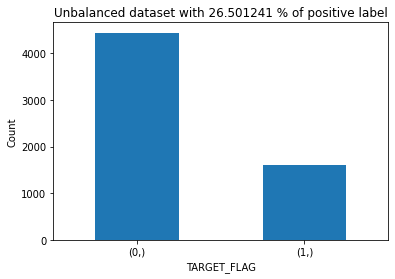

In [5]:
target.value_counts().plot(kind='bar', rot=0)
res = 100*target.mean()[0]
plt.ylabel("Count")
plt.title(f'Unbalanced dataset with {100*(target.mean())} of positive label')
plt.title('Unbalanced dataset with {:0f} % of positive label'.format(res))
plt.show()

## 1. Distribution of variables

### Analysis on the Categorical Attributes

In [8]:
for i in cats:
    print(f"categories in {i}: {pd.unique(df_cat[i])}")

categories in PARENT1: ['No' 'Yes']
categories in MSTATUS: ['z_No' 'Yes']
categories in SEX: ['M' 'z_F']
categories in EDUCATION: ['PhD' 'z_High School' 'Bachelors' 'Masters' '<High School']
categories in JOB: ['Professional' 'z_Blue Collar' 'Clerical' 'Lawyer' 'Manager' 'Home Maker'
 'Doctor' 'Student']
categories in CAR_USE: ['Private' 'Commercial']
categories in CAR_TYPE: ['Minivan' 'z_SUV' 'Sports Car' 'Van' 'Pickup' 'Panel Truck']
categories in RED_CAR: ['yes' 'no']
categories in REVOKED: ['No' 'Yes']
categories in URBANICITY: ['Highly Urban/ Urban' 'z_Highly Rural/ Rural']


In [9]:
df_cat.head()

,PARENT1,MSTATUS,SEX,EDUCATION,JOB,CAR_USE,CAR_TYPE,RED_CAR,REVOKED,URBANICITY
0,No,z_No,M,PhD,Professional,Private,Minivan,yes,No,Highly Urban/ Urban
1,No,z_No,M,z_High School,z_Blue Collar,Commercial,Minivan,yes,No,Highly Urban/ Urban
2,No,Yes,z_F,z_High School,Clerical,Private,z_SUV,no,No,Highly Urban/ Urban
3,Yes,z_No,z_F,Bachelors,z_Blue Collar,Commercial,Sports Car,no,No,Highly Urban/ Urban
4,No,z_No,z_F,Bachelors,Clerical,Private,z_SUV,no,No,Highly Urban/ Urban


In [10]:
print(df_cat.shape)
df_cat.describe() # Give general stats about the categorical variables

(6045, 10)


,PARENT1,MSTATUS,SEX,EDUCATION,JOB,CAR_USE,CAR_TYPE,RED_CAR,REVOKED,URBANICITY
count,6045,6045,6045,6045,6045,6045,6045,6045,6045,6045
unique,2,2,2,5,8,2,6,2,2,2
top,No,Yes,z_F,z_High School,z_Blue Collar,Private,z_SUV,no,No,Highly Urban/ Urban
freq,5223,3597,3359,1872,1476,4005,1781,4354,5299,4745


#### Analysis of Distribution

Now we analyse the distribution for each categorical feature and make some insights from the plots.

Let us plot four graphs at a time for ease of readability.


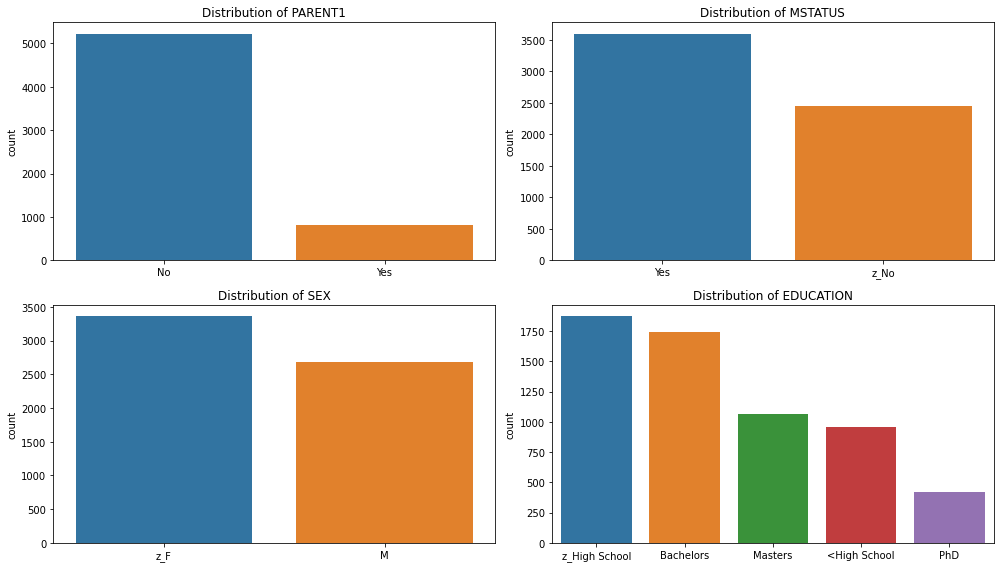

In [11]:
import warnings; warnings.simplefilter('ignore') # avoid warning messages

fig = plt.figure(1, (14, 8))

for i,cat in enumerate(df_cat.columns[:4]):
    ax = plt.subplot(2,2,i+1)
    sns.countplot(df_cat[cat], order=df_cat[cat].value_counts().index)
    ax.set_xlabel(None)
    ax.set_title(f'Distribution of {cat}')
    plt.tight_layout()

plt.show()

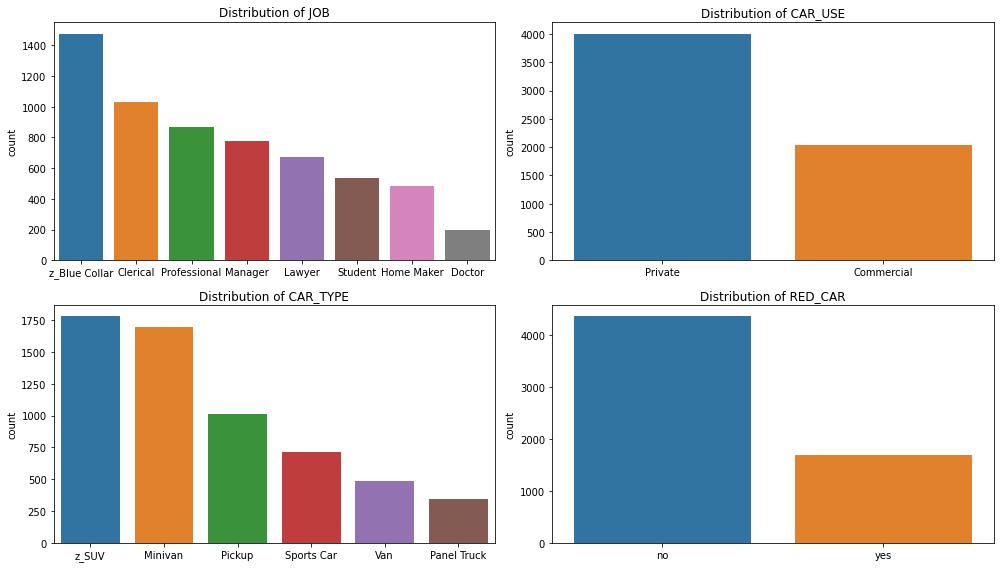

In [12]:
fig = plt.figure(1, (14, 8))

for i,cat in enumerate(df_cat.columns[4:8]):
    ax = plt.subplot(2,2,i+1)
    sns.countplot(df_cat[cat], order=df_cat[cat].value_counts().index)
    ax.set_xlabel(None)
    ax.set_title(f'Distribution of {cat}')
    plt.tight_layout()

plt.show()

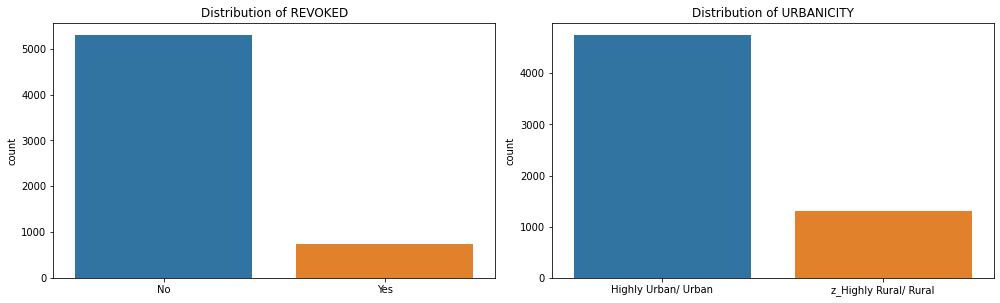

In [13]:
fig = plt.figure(1, (14, 8))

for i,cat in enumerate(df_cat.columns[8:12]): # Last two
    ax = plt.subplot(2,2,i+1)
    sns.countplot(df_cat[cat], order=df_cat[cat].value_counts().index)
    ax.set_xlabel(None)
    ax.set_title(f'Distribution of {cat}')
    plt.tight_layout()

plt.show()

Some inferences from the graphs above:

1. A majority of people have not had their insurance revoked previously in our dataset.
2. Our client database consists of mostly urban customers.
3. SUV and Vans are the most used vehicles in our insurance database. This could mean they are more frequently insured.


In [16]:
# calculate proportion of dominant classes in each category
num_rows, num_cols = df_train.shape
for i,cat in enumerate(df_cat.columns):
    val_counts = df_cat[cat].value_counts()
    dominant_frac = val_counts.iloc[0] / num_rows
    print(f'`{val_counts.index[0]}` alone contributes to {round(dominant_frac * 100, 2)}% of {cat}')

`No` alone contributes to 86.4% of PARENT1
`Yes` alone contributes to 59.5% of MSTATUS
`z_F` alone contributes to 55.57% of SEX
`z_High School` alone contributes to 30.97% of EDUCATION
`z_Blue Collar` alone contributes to 24.42% of JOB
`Private` alone contributes to 66.25% of CAR_USE
`z_SUV` alone contributes to 29.46% of CAR_TYPE
`no` alone contributes to 72.03% of RED_CAR
`No` alone contributes to 87.66% of REVOKED
`Highly Urban/ Urban` alone contributes to 78.49% of URBANICITY


#### Insights

We can infer from the above visualisations.
For example: we have an imbalanced data as nearly 80% our database is consisting of people living in urban societies. Nearly 88% of our database describes people who haven't had their insurance revoked in the past.

Based on such facts we can derive conclusions and define our approach/next steps.

###  Analysis on Numerical Attributes



In [81]:
df_train.head(2)

,PARENT1,MSTATUS,SEX,EDUCATION,JOB,CAR_USE,CAR_TYPE,RED_CAR,REVOKED,URBANICITY,...,YOJ,TRAVTIME,TIF,CLM_FREQ,MVR_PTS,CAR_AGE,INCOME,HOME_VAL,BLUEBOOK,OLDCLAIM
0,No,z_No,M,PhD,Professional,Private,Minivan,yes,No,Highly Urban/ Urban,...,11.0,14,11,2,3,18.0,67349.0,0.0,14230.0,4461.0
1,No,z_No,M,z_High School,z_Blue Collar,Commercial,Minivan,yes,No,Highly Urban/ Urban,...,11.0,22,1,0,0,1.0,91449.0,257252.0,14940.0,0.0


In [86]:
#df.head()
print(f'numerical variables:  {nums}')

numerical variables:  ['KIDSDRIV', 'AGE', 'HOMEKIDS', 'YOJ', 'TRAVTIME', 'TIF', 'CLM_FREQ', 'MVR_PTS', 'CAR_AGE', 'INCOME', 'HOME_VAL', 'BLUEBOOK', 'OLDCLAIM']


In [87]:
print(df_num.shape)
df_num.describe() # First glance

(6045, 13)


,KIDSDRIV,AGE,HOMEKIDS,YOJ,TRAVTIME,TIF,CLM_FREQ,MVR_PTS,CAR_AGE,INCOME,HOME_VAL,BLUEBOOK,OLDCLAIM
count,6045.000000,6045.000000,6045.000000,6045.000000,6045.000000,6045.000000,6045.000000,6045.000000,6045.000000,6045.000000,6045.000000,6045.000000,6045.000000
mean,0.173201,44.628453,0.743424,10.494624,33.694293,5.360298,0.784119,1.699752,7.920926,58177.013234,150102.074607,15235.609595,4004.875600
std,0.515424,8.707805,1.132740,4.138508,15.892961,4.144664,1.153884,2.157899,5.583880,43826.975075,123728.720923,8040.962717,8822.509329
min,0.000000,16.000000,0.000000,0.000000,5.000000,1.000000,0.000000,0.000000,-3.000000,0.000000,0.000000,1500.000000,0.000000
25%,0.000000,39.000000,0.000000,9.000000,23.000000,1.000000,0.000000,0.000000,1.000000,26748.000000,0.000000,9170.000000,0.000000
50%,0.000000,45.000000,0.000000,11.000000,33.000000,4.000000,0.000000,1.000000,8.000000,51624.000000,159152.000000,14080.000000,0.000000
75%,0.000000,51.000000,1.000000,13.000000,44.000000,7.000000,2.000000,3.000000,12.000000,81287.000000,233053.000000,20120.000000,4546.000000
max,4.000000,81.000000,5.000000,23.000000,142.000000,25.000000,5.000000,13.000000,28.000000,367030.000000,885282.000000,65970.000000,57037.000000


Inferences: Before we derive information on the variance of each column they should be normalised to the same scale.

Other information like the mean income, home values, car age can be seen in the summary description above.

#### Distribution analysis

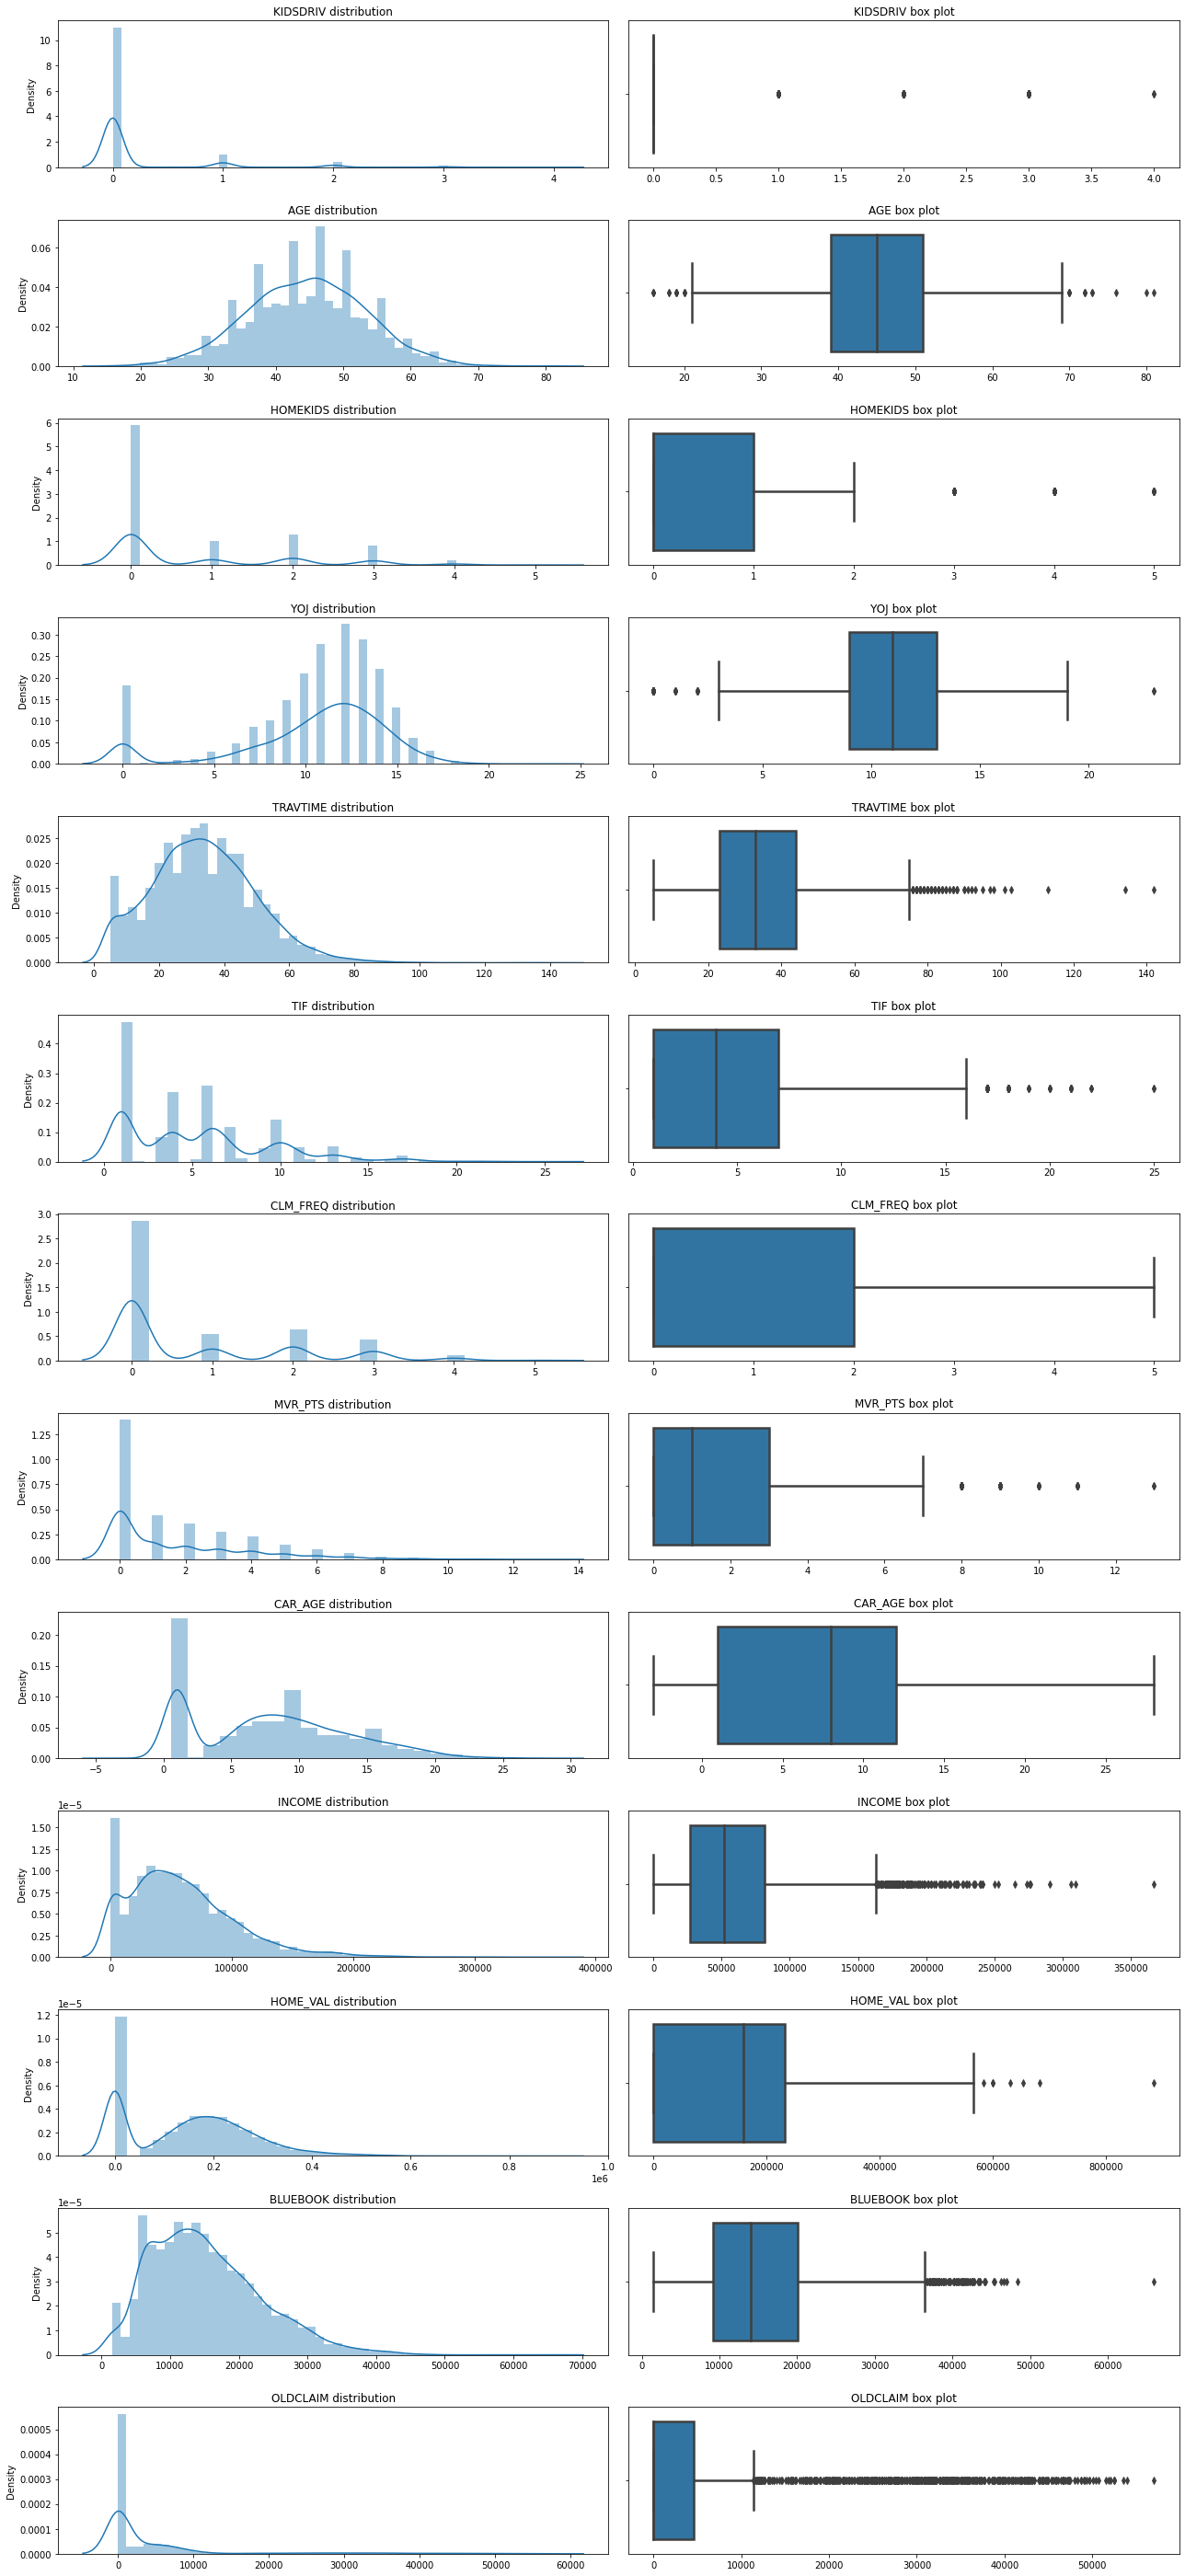

In [17]:
rows = len(nums)
cols = 2

fig = plt.figure(1, (18, rows*3))

i = 0
for col in nums:
    
    i += 1
    ax1 = plt.subplot(rows, cols,i)
#     ax1.hist(df[col], alpha=0.6)
    sns.distplot(df_num[col])
    ax1.set_xlabel(None)
    ax1.set_title(f'{col} distribution')
    plt.tight_layout()

    i += 1
    ax3 = plt.subplot(rows, cols,i)
    sns.boxplot(df_num[col], orient='h', linewidth=2.5)
    ax3.set_xlabel(None)
    ax3.set_title(f'{col} box plot')
    plt.tight_layout()
    
 ###  
 ### Warning: Running this cell could take a long time to plot distributions of each numerical variable   
 ###



We can draw many conclusions from the above visualisation upon a closer look.

For example, at first glance, we see:

- No distribution is normal but 'AGE' and 'TRAVTIME' come close to an approximation.

- From the box plot people with income above ~160k$ are very few and the outliers of the data. 

- The majority of the income (25th-75th percentile) lies in the range of income 30k\\$-80k\\$ approx.

- Nominal variables which have been left as numerical logically have peaks only in the discrete categories.

- Majority of insurance customers have cars which are 2-12 years old.



## 2. Influence on target variable

[11:13:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


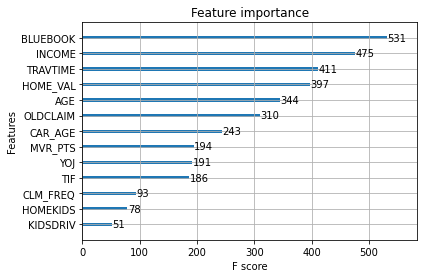

In [181]:
# Let us check the importance attributed to each variable by Random forests and XG-boost

import xgboost as xgb
from xgboost import plot_importance
from matplotlib import pyplot

import matplotlib.pyplot as plt

# fit model no training data
model = xgb.XGBClassifier()
model.fit(df_num, target)
# plot feature importance
plot_importance(model)
pyplot.show()



Inferences: 

- Bluebook is the most important feature affecting whether there is a claim or not. This is logical because a blue book measures the risk of cars and mentions standard  price quotes for every model make and year.
- Interestingly, a person's income decides how likely they are to file an insurance claim. We will later see that they are negatively correlated. 
    

Let us plot the top two independant variables - Bluebook and Income against the target 'TARGET_FLAG'.


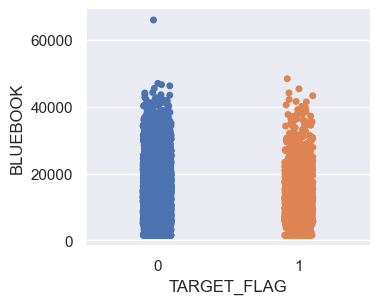

In [240]:
# Bluebook vs Target
sns.catplot(x="TARGET_FLAG", y="BLUEBOOK", data=df_train,height=3, aspect=10/8)

In the visualisation we do not see any direct effect of the bluebook value on the target flag. 

Although in the trees constructed by XGBoost this variable must be critical in reducing the GINI-impurity index when employed at the right place in the tree structure to distinguish classes.

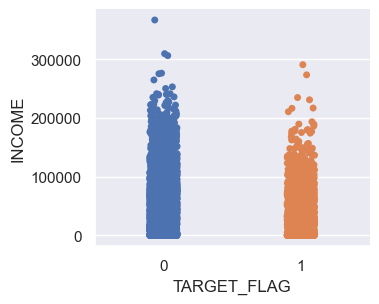

In [241]:
# Income vs Target
sns.catplot(x="TARGET_FLAG", y="INCOME", data=df_train,height=3, aspect=10/8)

We do not see a direct influence on the target through this plot and hence deduce the same inference as we did for the figure above 'Bluebook vs Target'.  

##### Note:

The above feature importance visualisation is just an indicative result. 
It excludes categorical variables and also it does not take into account the combined effects on the target variable.

Internally this is performed through measurement of the average decrease of GINI impurity index at the split node with that particular variable.

#### Categorical variables against the target

Scipy has chi2 test available, let's use it to test dependency of all categorical attributes with `TARGET_FLAG`

In [231]:
# Import the function
from scipy.stats import chi2_contingency

#Testing the relationship between parent1 and target_flag
chi_res = chi2_contingency(pd.crosstab(df_train['PARENT1'],df_train['TARGET_FLAG']))
print('Chi2 Statistic: {}, p-value: {}'.format(chi_res[0], chi_res[1]))

Chi2 Statistic: 157.60965111529362, p-value: 3.766471296317425e-36


In [243]:
chi2_check = []
result = []
for i in cats:
    if chi2_contingency(pd.crosstab(df_train['TARGET_FLAG'], df_train[i]))[1] < 0.05:
        chi2_check.append('Null Hypothesis rejected')
        result.append('Dependant')
    else:
        chi2_check.append('Fail to Reject Null Hypothesis')
        result.append('Independant')
    res = pd.DataFrame(data = [cats, chi2_check,result]).T 
        
res.columns = ['Column', 'Hypothesis','Conclusion']
print(res)

       Column                      Hypothesis   Conclusion
0     PARENT1        Null Hypothesis rejected    Dependant
1     MSTATUS        Null Hypothesis rejected    Dependant
2         SEX  Fail to Reject Null Hypothesis  Independant
3   EDUCATION        Null Hypothesis rejected    Dependant
4         JOB        Null Hypothesis rejected    Dependant
5     CAR_USE        Null Hypothesis rejected    Dependant
6    CAR_TYPE        Null Hypothesis rejected    Dependant
7     RED_CAR  Fail to Reject Null Hypothesis  Independant
8     REVOKED        Null Hypothesis rejected    Dependant
9  URBANICITY        Null Hypothesis rejected    Dependant


The statistics above show that according to our data both men and women claim insurance without much difference in behaviour. 

Additionally, we find that having a 'Red Car' does not influence the claim.

In future analyses these variables could be dropped and we can test to see if the model performance has increased.

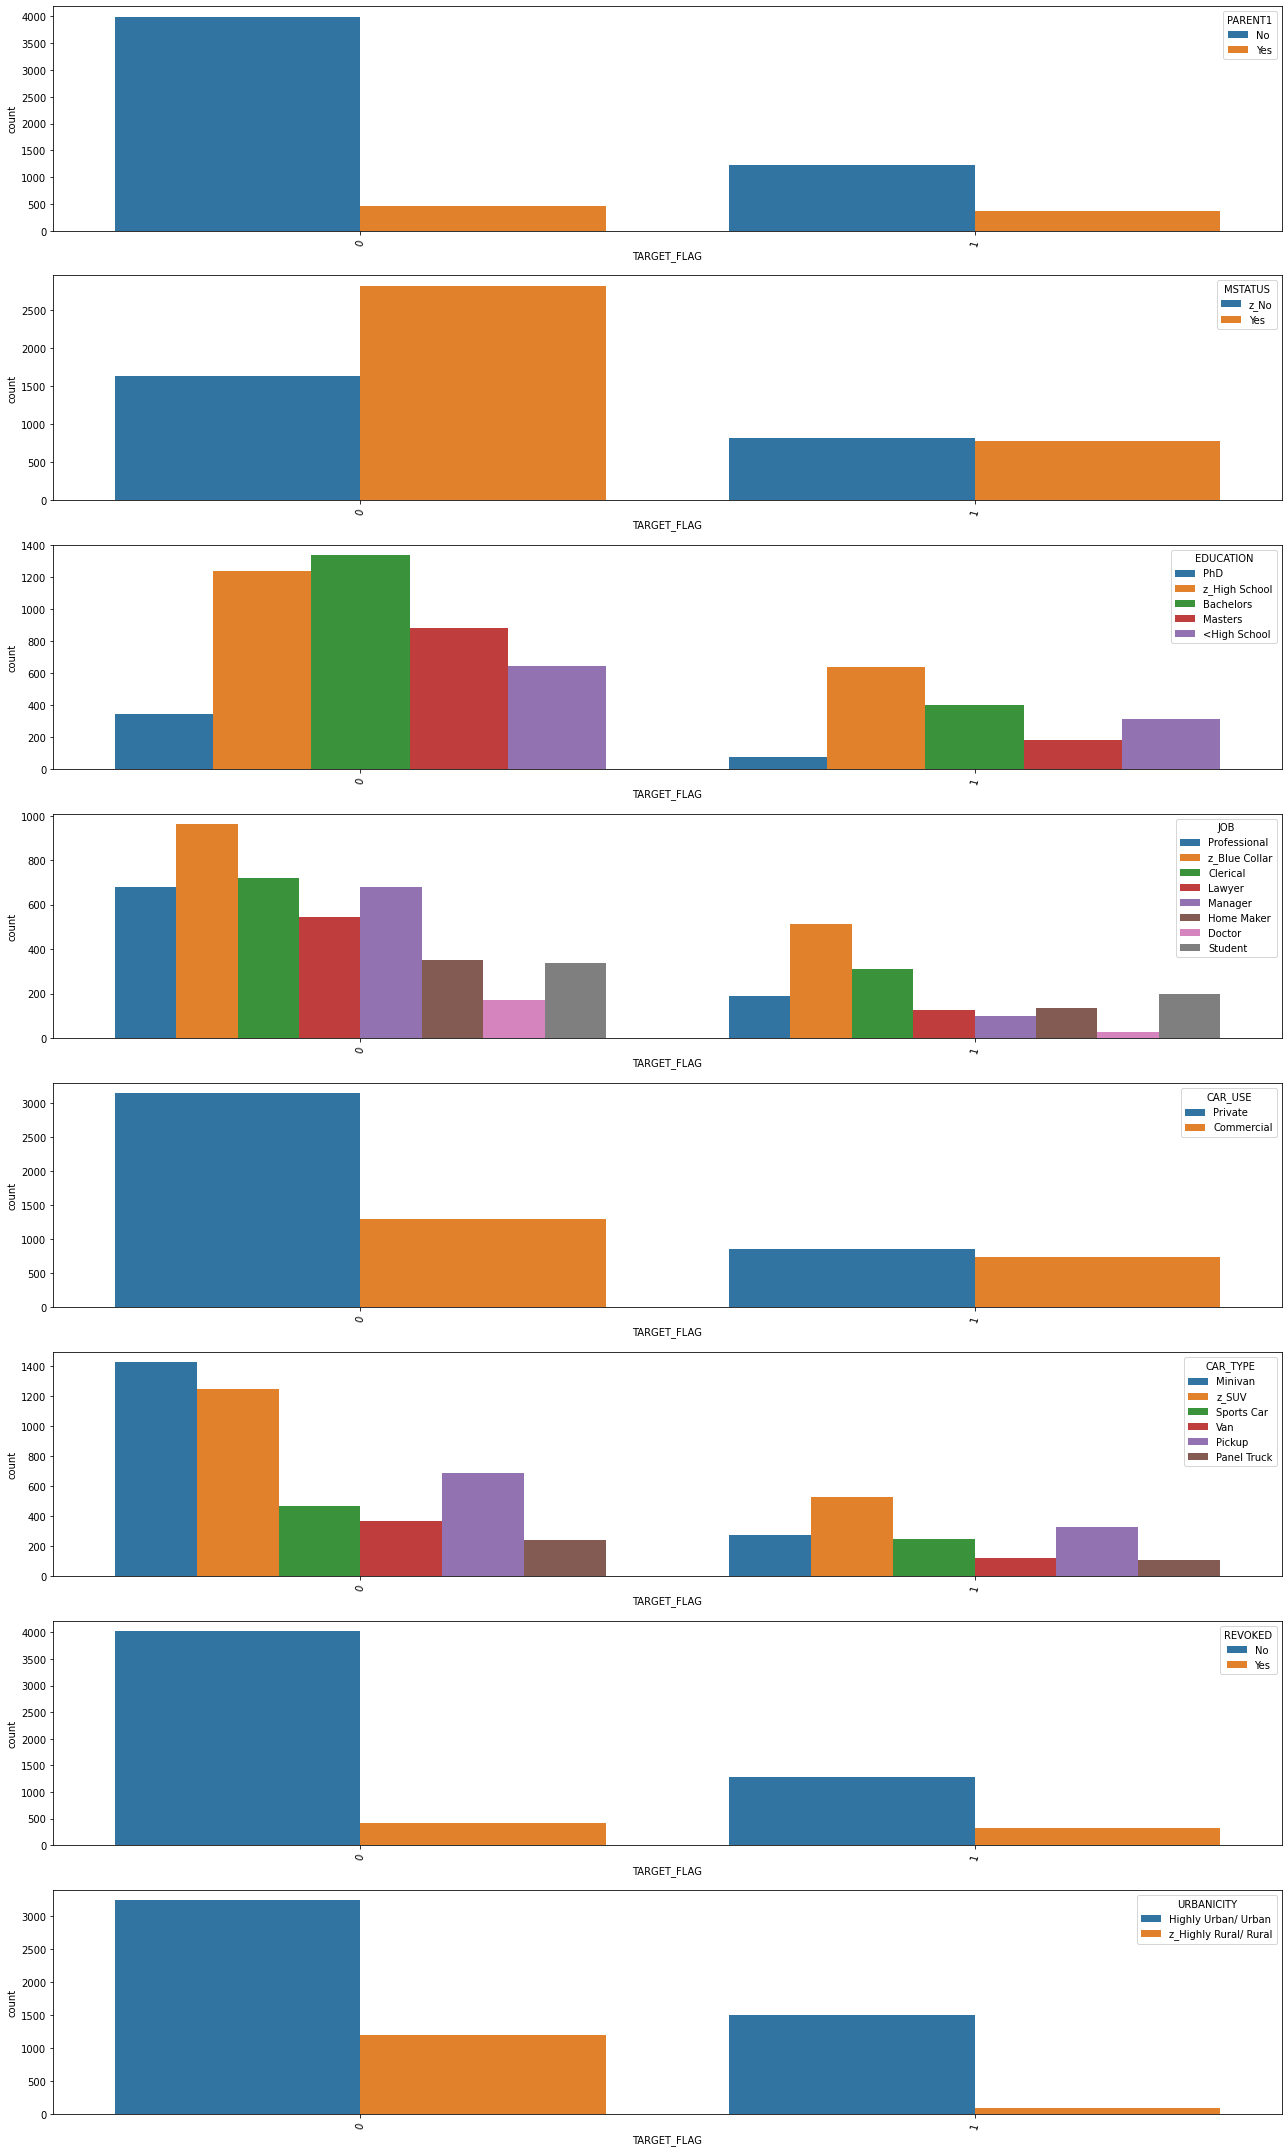

In [257]:
fig = plt.figure(1, (18,30))

for i,cat in enumerate(['PARENT1', 'MSTATUS','EDUCATION','JOB', 'CAR_USE', 'CAR_TYPE','REVOKED','URBANICITY']):
    ax = plt.subplot(8,1,i+1)
    sns.countplot(x='TARGET_FLAG', hue=cat, data=df_train)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=75)
    plt.tight_layout()

We can draw many conclusions from the above visualisation upon a closer look.

For example, at first glance, we see:

- Most people who claim for insurance are located in the highly urban environments.

- The most claims are from the SUV vehicles.

- Highly educated people (PHD) are the least likely to file an insurance claim.

- Claims arise fairly equally from private and commerical cars.

- Doctors are least likely to file an insurance claim compared to other professions.

## 3. Relations between the variables

### Analysis of relationship between different numerical attributes

In [268]:
# Basic heatmap - if traditional heatmap is preferred

# corr = df_train.corr()
# ax = sns.heatmap(
#     corr, 
#     vmin=-1, vmax=1, center=0,
#     cmap=sns.diverging_palette(20, 220, n=200),
#     square=True
# )
# ax.set_xticklabels(
#     ax.get_xticklabels(),
#     rotation=45,
#     horizontalalignment='right'
# );

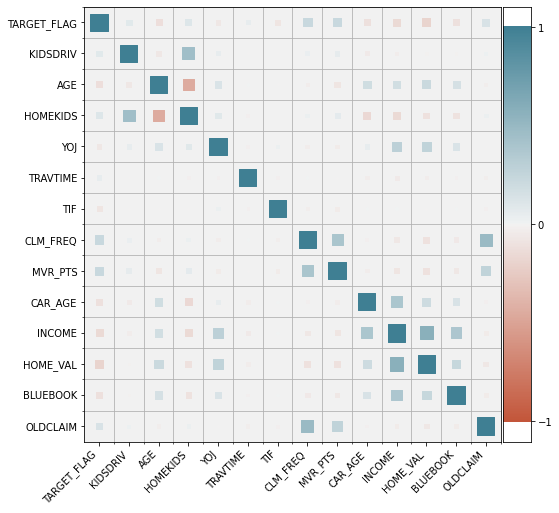

In [113]:
# Alternate visualisation where the grids are demarkated for ease of interpretability 
# and the size of the square represents magnitude of correlation

# Import the two methods from heatmap library
from heatmap import heatmap, corrplot

plt.figure(figsize=(8, 8))
corrplot(corr, size_scale=300);

# For a quick glance

Inference : Most of the heatmap is sparse. This implies that most pairs of numerical variables are not correlated to each other. 

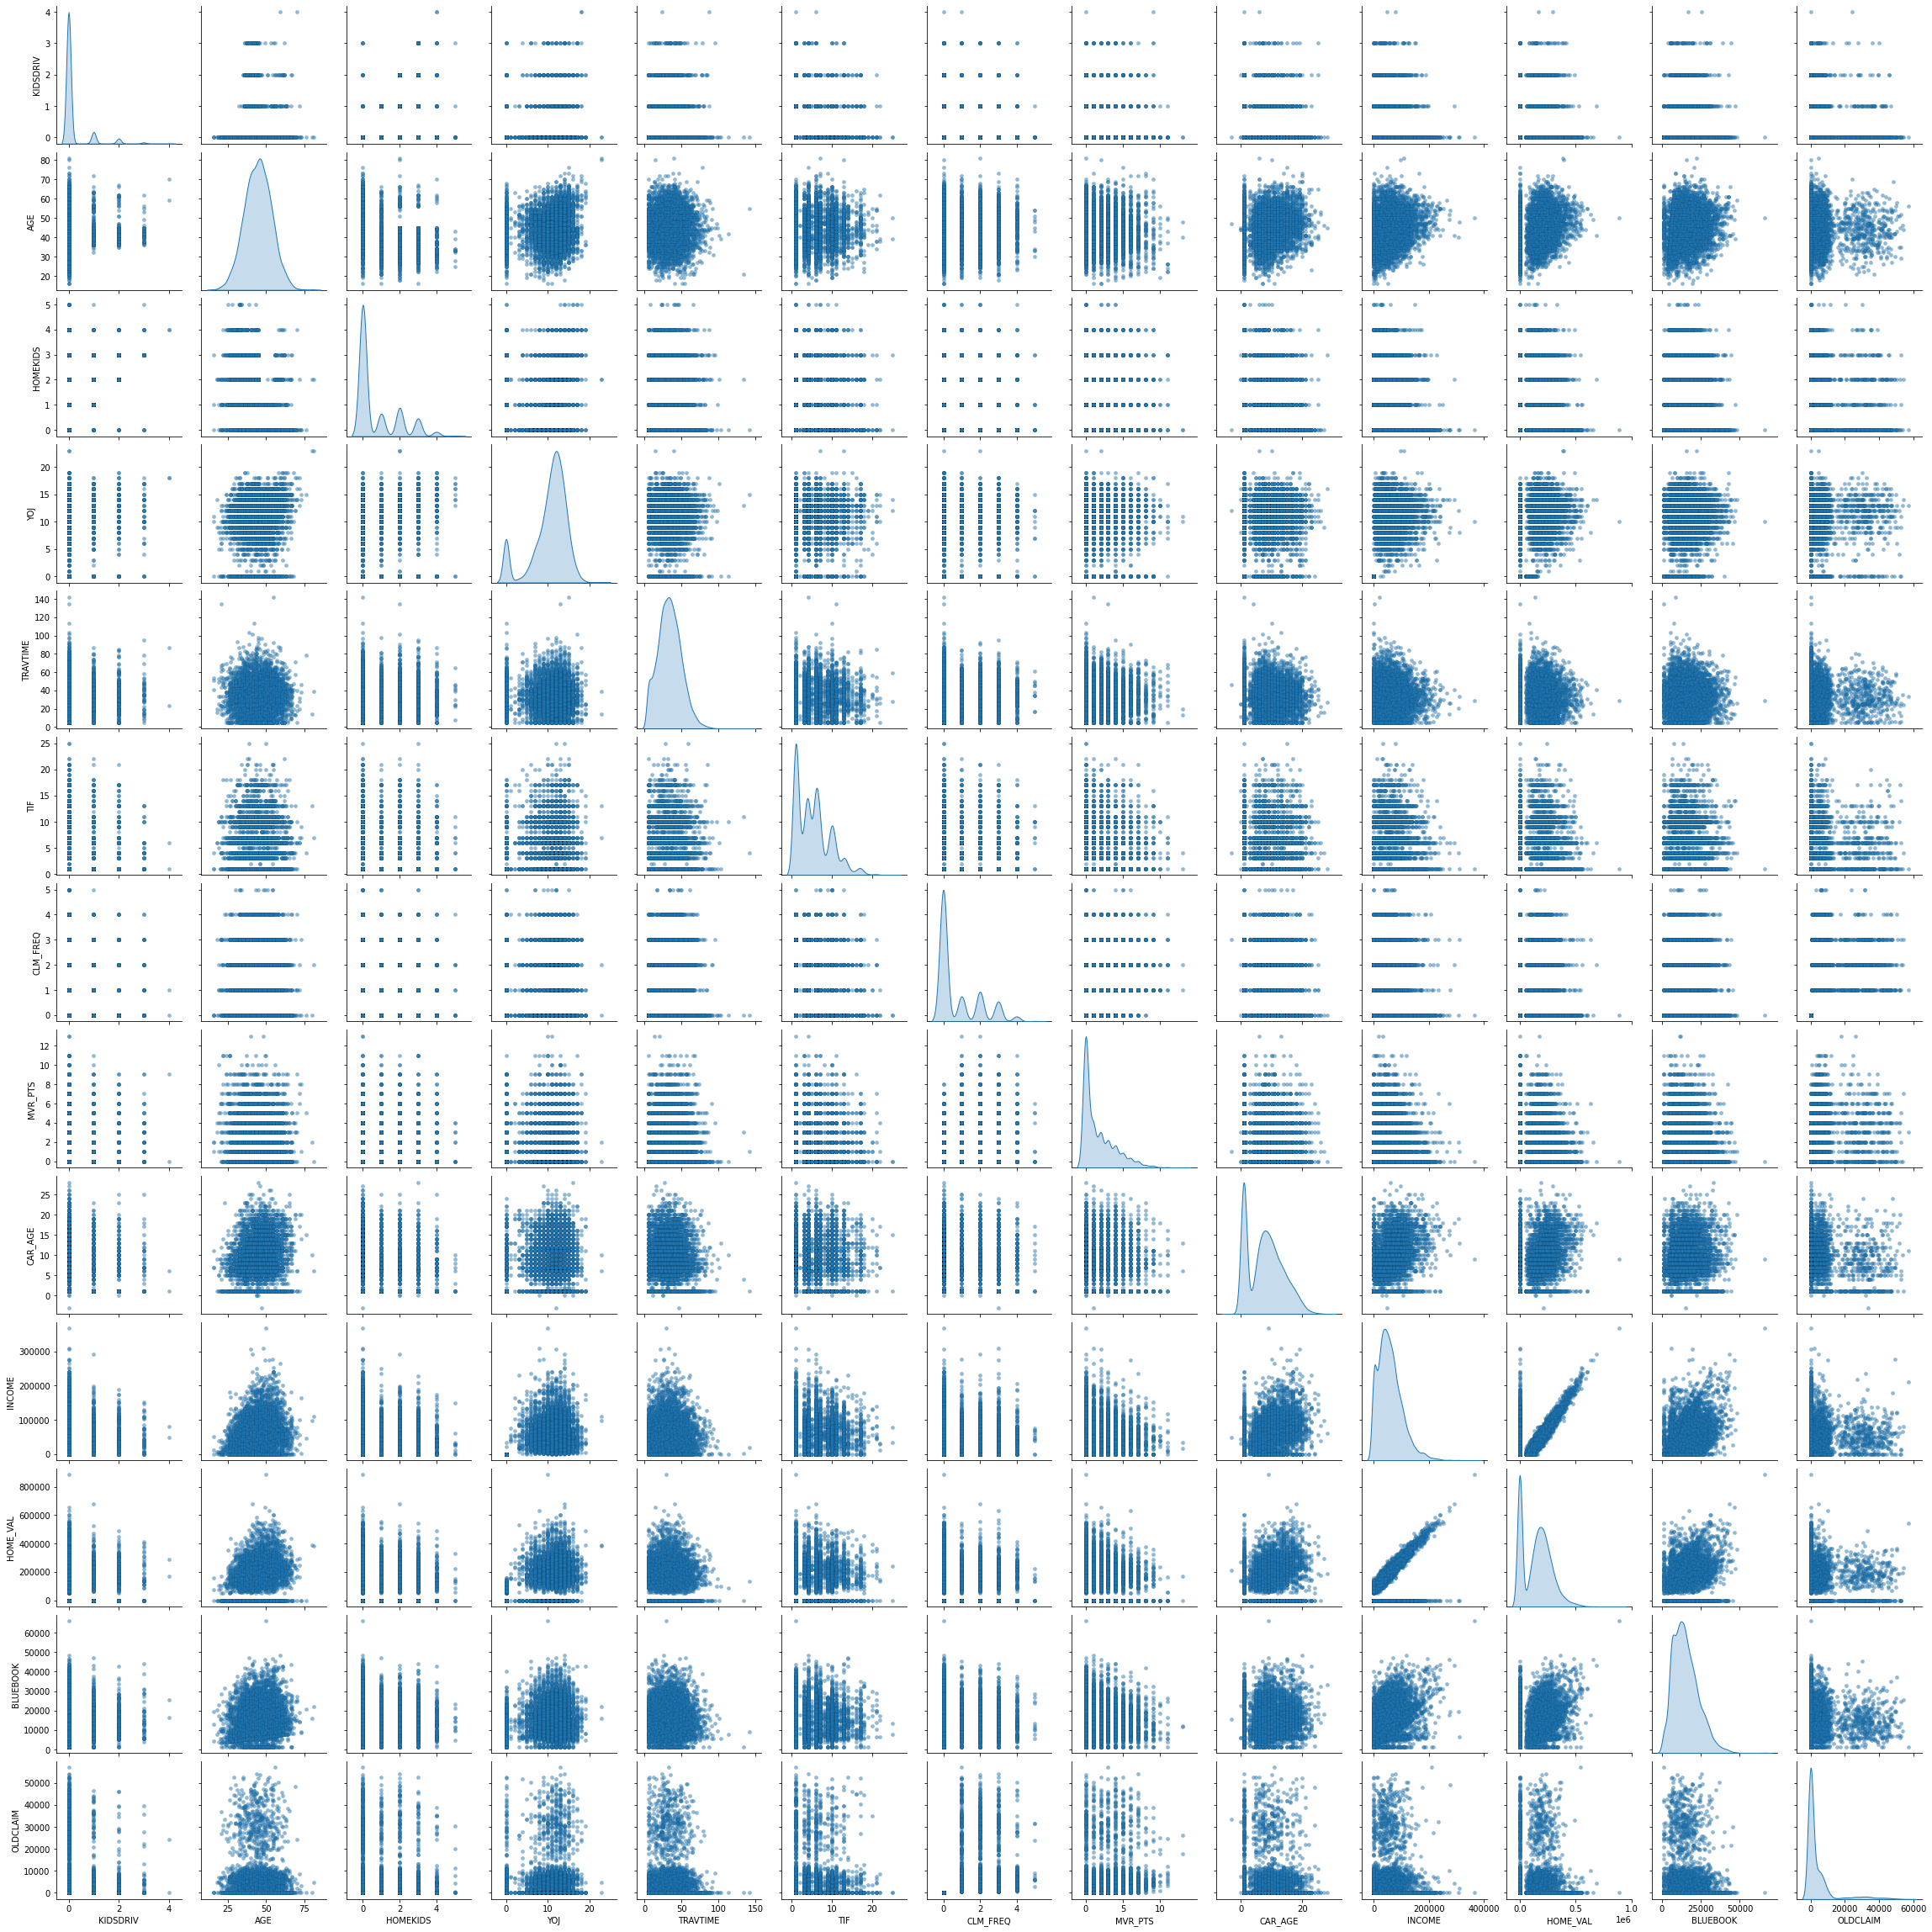

In [125]:
# Plot each numerical variable against the other

sns.pairplot(data=df_num, vars=nums, diag_kind='kde',
            plot_kws=dict(s=20, edgecolor="k", linewidth=0.1, alpha=0.5), diag_kws=dict(shade=True))
plt.show()


Due to a large number of variables, the above plot is not easily interpretable,
Thus, using this visualisation and the spearman correlation heatmap of the next cell, we can choose interesting pairs of numerical variables and plot them again to inspect in detail. 

Note: the above picture can be saved and inspected if one really wants to do so.

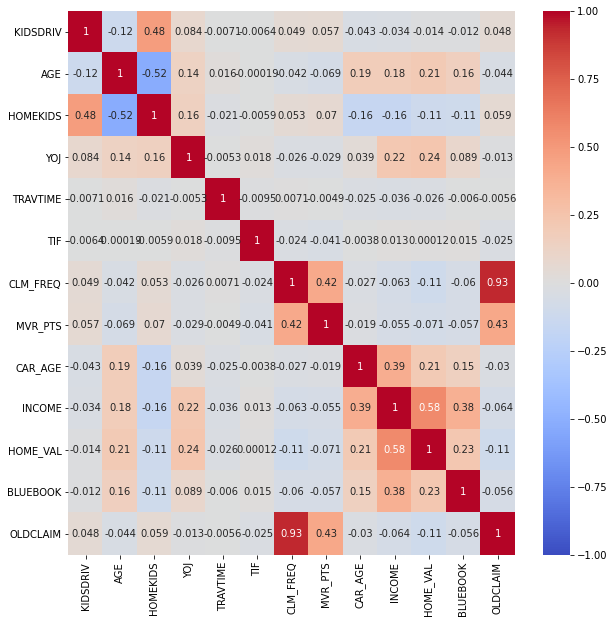

In [132]:
# Annotated heatmap for the correlation numbers
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_num.corr(method='spearman'), annot = True, vmin = -1, vmax = 1, center = 0, cmap = 'coolwarm',ax=ax)
plt.show()

Two immediate observations from the above plot shows that :
1. Income positively correlated to house cost. This is fairly logical as a person earning more would be likely to purchase a more expensive house.

2. Age of person is negatively correlated with kids in home. This also makes sense as older insurance holders will have older kids who will move out eventually.

#### Plot certain pairs individually to have a closer look 

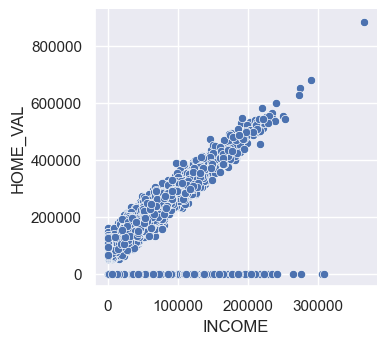

In [237]:
sns.relplot(x="INCOME", y="HOME_VAL", data=df_num,height=3.4, aspect=9/8);  # The graph shows the positive correlation indeed

Indeed, the home values are positively correlated to the income as we saw in the heatmap. 

We also observe that many values for 'HOME_VAL' are 0. This could mean that the person does not own a house.

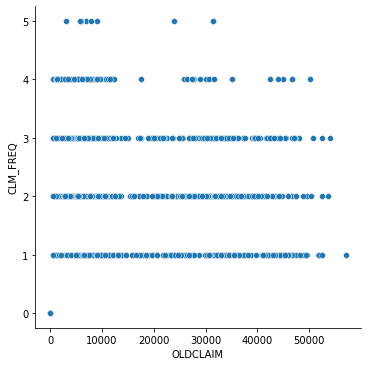

In [20]:
sns.relplot(x="OLDCLAIM", y="CLM_FREQ", data=df_num); # Visualise Claim frequency vs old claim value

The people who have claimed 5 times previously have claimed for lesser amounts than other people.

### Analysis of relationship between different categorical attributes

As an example analysis, let us look at the relationship between a person's job, car type and whether their car was private or commercial (car_use) and how this afftected if their insurance was revoked previously or not.

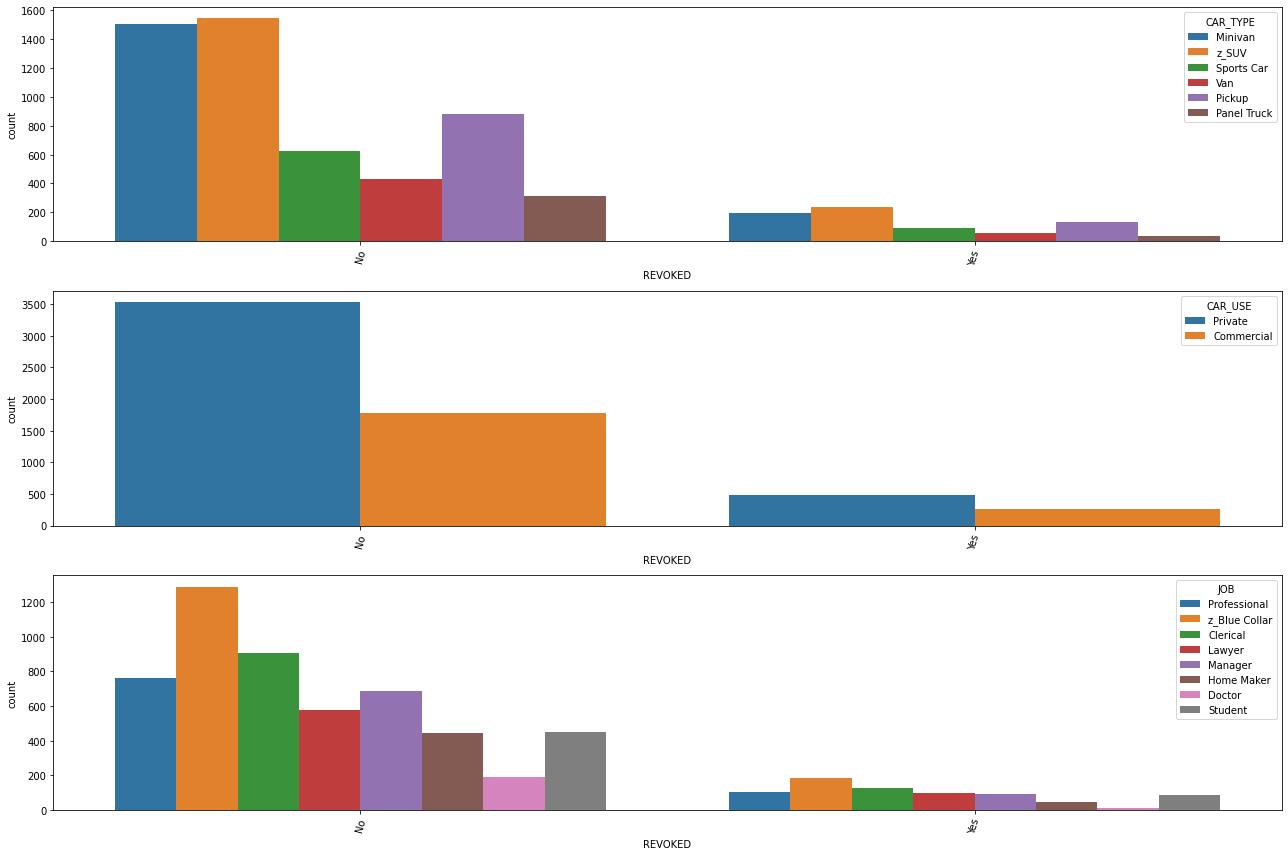

In [130]:
## revoked used explain

fig = plt.figure(1, (18,12))

for i,cat in enumerate(['CAR_TYPE', 'CAR_USE', 'JOB']):
    ax = plt.subplot(3,1,i+1)
    sns.countplot(x='REVOKED', hue=cat, data=df_cat)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=75)
    plt.tight_layout()

Some inferences:

- We see that a previously revoked status does not have any strong affinity with a particular type in any variable we tested above.
- SUV and Minivan owners are more than twice likely to have had their insurance revoked in the past compared to any other vehicle owners.
- Very few doctors have had their insurance revoked previously.
- In general, our database consists of a small percentage of people with previously revoked claims.

In the above figure we have analysed the people with revoked insurance by looking at their job, car type and whether they were using a private or a commercial vehicle. This type of analyses give us insight on our data and who is more likely to have their insurance revoked.

Based on our analysis goals, we could perform more of such visualisations.

### Analysis of relationship between categorical and numerical attributes

We cannot define correlation when we are dealing with unordered categorical variables.
Hence finding correlations between the categorical (nominal) and numerical attributes is not possible.

Instead let us plot a few continous variables against the categorical to get an idea.

1. Income VS Revoked 

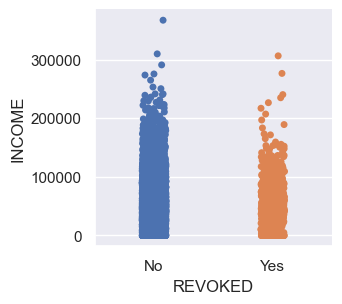

In [228]:
sns.catplot(x="REVOKED", y="INCOME", data=df_train,height=3, aspect=9/8)

Majority of revoked insurances come from people in the lower half salary group. A point to keep in mind is that the fact that our database consists of mainly of people of income between 30k\\$ to 80k\\$ as we have seen before. This phenomenon could influence the result.

2. Bluebook VS Car type

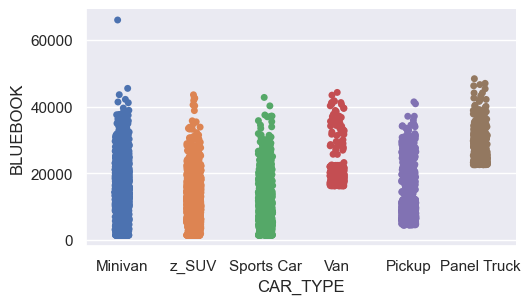

In [221]:
sns.catplot(x="CAR_TYPE", y="BLUEBOOK", data=df_train,height=3, aspect=14/8)

We can infer that Panel Trucks and Vans are usually higher in cost to insure. 

The least cost of insuring one is multiple times the cheapest cost of minivans, SUVs and Sports cars.

3.  Claim frequency VS Job type

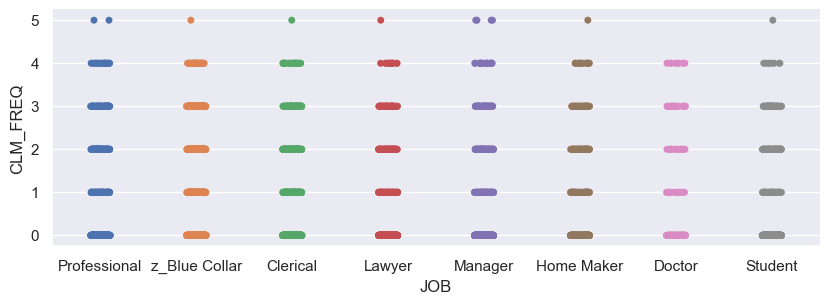

In [232]:
sns.catplot(x="JOB", y="CLM_FREQ", data=df_train,height=3, aspect=22/8)

According to our data, we see that no particular profession has had a higher tendancy to claim multiple times in the past. 

## 4. Next steps:

Now that we have analysed and had a closer look at our data, we will now proceed to Machine learning modelling.

At this stage we could filter out certain variables we see as less important for the target prediction using the visualisations above.

However, I have avoided this step for now as we will later see that variables perceived to be unimportant individually could have effects when combined with other ones or could act like a control variable thereby influencing the results.

It is advisable to let the model perform the feature selection during the course of training.

We shall see how this is performed in the next notebook discussing the modelling process.